In [ ]:
import numpy as np
import pandas as pd

IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

 Bhavuk_KNN.ipynb		       Untitled12.ipynb
 cloud.ipynb			      'Untitled (13)'
 datasetMITM.csv		      'Untitled (14)'
 diabetes.csv			      'Untitled (15)'
 iniknn.ipynb			      'Untitled (16)'
 Materi-Kriptografi-KJK.ipynb	       Untitled1.ipynb
 mitm_ANN_Smote.ipynb		      'Untitled (2)'
 MITM.csv			       Untitled2.ipynb
'newiec104 (1).csv'		      'Untitled (3)'
 newiec104.csv			       Untitled3.ipynb
 Random_Forest_CLass.ipynb	      'Untitled (4)'
 RFMitm.ipynb			       Untitled4.ipynb
 SergioSeptiano_09011181621015.ipynb  'Untitled (5)'
 Tugas_KJK.ipynb		       Untitled5.ipynb
 UASejak.ipynb			      'Untitled (6)'
 Untitled			       Untitled6.ipynb
 Untitled0.ipynb		      'Untitled (7)'
'Untitled (1)'			       Untitled7.ipynb
'Untitled (10)'			      'Untitled (8)'
 Untitled10.ipynb		       Untitled8.ipynb
'Untitled (11)'			      'Untitled (9)'
 Untitled11.ipynb		       Untitled9.ipynb
'Untitled (12)'			       Untitled-checkpoint.ipynb


In [ ]:
columns = ["frame","frame_length","start","apdulen","type","rx","tx","type_id","causeTx","ioa","numix","oa","qds","qoi","value","label"]
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MITM.csv', header=None, names = columns)

In [ ]:
dataset.isnull().sum()

frame               0
frame_length        0
start               0
apdulen             0
type                0
rx                  0
tx                  0
type_id             0
causeTx             0
ioa                 0
numix               0
oa                  2
qds             35244
qoi             26431
value           35243
label               0
dtype: int64

REMOVE NaaN Value

In [ ]:
dataset.oa = dataset.oa.fillna(dataset.oa.mean())
dataset.qds = dataset.qds.fillna(dataset.qds.mean())
dataset.qoi = dataset.qoi.fillna(dataset.qoi.mean())
dataset.value = dataset.value.fillna(dataset.value.mean())

In [ ]:
dataset

,frame,frame_length,start,apdulen,type,rx,tx,type_id,causeTx,ioa,numix,oa,qds,qoi,value,label
0,1,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
1,2,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
2,3,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
3,4,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
4,5,82,68,14,0,0,0,100,6,0,1,0.0,241.0,20.0,12644.381357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44067,44068,82,68,14,0,5285,3524,100,6,0,1,0.0,241.0,20.0,12644.381357,0
44068,44069,100,68,16,0,3525,5286,11,20,1,1,0.0,241.0,20.0,14850.000000,0
44069,44070,100,68,14,0,3525,5287,100,10,0,1,0.0,241.0,20.0,12644.381357,0
44070,44071,100,68,16,0,3525,5286,11,20,1,1,0.0,241.0,20.0,14860.000000,0


In [ ]:
target = 'label'

0    42819
1     1253
Name: label, dtype: int64


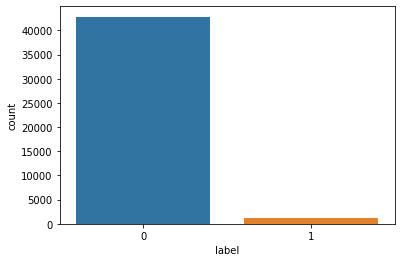

In [ ]:
import seaborn as sns
sns.countplot(x=target ,data=dataset)
print(dataset[target].value_counts())

UNDERSAMPLING

In [ ]:
minority_class_len = len(dataset[dataset[target] == 1])
print(minority_class_len)

1253


In [ ]:
majority_class_indices = dataset[dataset[target] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            44062, 44063, 44064, 44065, 44066, 44067, 44068, 44069, 44070,
            44071],
           dtype='int64', length=42819)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

1253


In [ ]:
minority_class_indices = dataset[dataset[target] == 1].index
print(minority_class_indices)

Int64Index([ 7326,  7330,  7331,  7333,  7343,  9367,  9375,  9380,  9432,
            14215,
            ...
            43935, 43939, 43948, 43953, 43960, 43967, 43985, 44010, 44035,
            44060],
           dtype='int64', length=1253)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [ ]:
under_sample = dataset.loc[under_sample_indices]

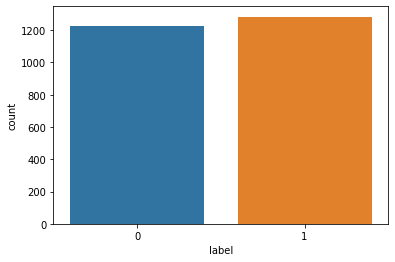

In [ ]:
sns.countplot(x=target, data=under_sample)

MAKE X,y

In [ ]:
y =under_sample.loc[:, dataset.columns==target]
X = under_sample.loc[:, dataset.columns!=target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_test = forest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[598,  13],
       [  6, 636]])

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Tabel Confusion Matrix


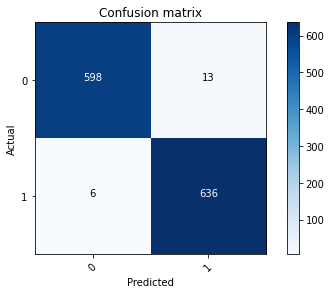

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)


0.9848363926576217

In [ ]:
FAR = (13/(13+636))
print("\n%s: %.2f%%" % ("FAR", FAR*100))


FAR: 2.00%


In [ ]:
UND = (6/(6+598))
print("\n%s: %.2f%%" % ("UND", UND*100))


UND: 0.99%


In [ ]:
Precision = (598/(598+13))
print("\n%s: %.2f%%" % ("presisi", Precision*100))


presisi: 97.87%


In [ ]:
RECALL = (598/(598+6))
print("\n%s: %.2f%%" % ("RECALL", RECALL*100))


RECALL: 99.01%
